# Расчетное задание 1

## Идентификация сообщений, передаваемых по зашумленному каналу связи

### Часть 1. Последовательная передача одинаковых сообщений

#### 1.1. Определение переданного сообщения

##### Исходный алфавит

In [1]:
alphabet = {}
with open('alphabet.txt', encoding='utf8') as f:
    content = f.readlines()
    content = [x.rstrip().split('\t') for x in content] 
    for pair in content:
        alphabet[pair[0]] = pair[1]
    print(alphabet)

{'-': '1010001', 'к': '0110110', 'е': '0110000', '(': '1010100', 'Ы': '0100110', 'я': '1001011', 'Ю': '0101001', 'Я': '0101010', 'ь': '1000110', 'д': '0101111', '?': '1010000', 'ж': '0110010', 'М': '0010111', '6': '0000110', 'ы': '1000111', '!': '1001110', 'Т': '0011101', 'с': '0111101', 'п': '0111011', 'И': '0010011', 'и': '0110100', 'ф': '1000000', '0': '0000000', 'Ч': '0100010', 'О': '0011001', 'н': '0111001', 'ё': '0110001', 'а': '0101011', '8': '0001000', 'в': '0101101', '4': '0000100', 'Г': '0001101', 'э': '1001001', 'Ф': '0011111', 'Ц': '0100001', 'ч': '1000011', 'Щ': '0100100', 'л': '0110111', 'т': '0111110', 'й': '0110101', 'Ш': '0100011', 'Р': '0011011', 'Л': '0010110', ')': '1010101', 'У': '0011110', 'В': '0001100', ',': '1001101', '№': '1010011', 'х': '1000001', '7': '0000111', 'А': '0001010', '.': '1001100', 'ц': '1000010', 'Н': '0011000', 'ю': '1001010', 'Ь': '0100101', '5': '0000101', 'Й': '0010100', ' ': '1010110', '3': '0000011', 'П': '0011010', ':': '1001111', 'З': '0

In [2]:
def get_char(code: str):
    for key, value in alphabet.items():
        if value == code:
            return key
    #return [k for k, v in dic.items() if v == code][0]

Словарь априорных вероятностей:

In [3]:
apriori = alphabet.copy()
n = len(alphabet)
p = 1 / n
for key, value in apriori.items():
    apriori[key] = p

Функция, находящая максимальное значение в словаре

In [4]:
def find_max(d: dict):
    return max(d, key=d.get)

#### Входные данные

In [5]:
with open('input.txt', encoding='utf8') as f:
    content = f.readlines()

Колличество букв в каждом сообщении равно $s$:

In [6]:
s = int(content[0].split(': ')[1])
print('s = {s}'.format(s=s))

s = 222


Вероятность искажения каждого отдельного символа (бита) равна $q$, вероятность правильной передачи $p = 1 - q$:

In [7]:
q = float(content[2].split(': ')[1])
p = 1 - q
print('p = {p}, q = {q}'.format(p=p, q=q))

p = 0.832, q = 0.168


Колличествно передач равно $m$:

In [8]:
m = int(content[3].split(': ')[1])
print('m = {m}'.format(m=m))

m = 18


Функция вероятности того, что $code1$ и $code2$ - это одно и то же сообщение 

In [9]:
def find_probability(code1, code2):
    assert len(code1) == len(code2)
    probability = 1
    for i in range(len(code1)):
        probability = probability * (p if code1[i] == code2[i] else q)
    return probability

Функция расчета апостариорной вероятности при получении кода $code$:

In [10]:
def find_prob_message(dict_char: dict, cond_probs: dict):
    summ = 0
    for char in cond_probs.keys():
        summ = summ + cond_probs[char] * dict_char[char]
    return summ

def posterior_probabilities(dict_char: dict, code: str):
    cond_probs = alphabet.copy()
    for char in cond_probs.keys():
        cond_probs[char] = find_probability(alphabet[char], code)
    
    for char in dict_char.keys():
        new_prob = cond_probs[char] * dict_char[char] / find_prob_message(dict_char, cond_probs)
        dict_char[char] = new_prob

In [11]:
def posterior_probabilities(dict_char: dict, code: str):
    cond_probs = alphabet.copy()
    for char in cond_probs.keys():
        cond_probs[char] = find_probability(alphabet[char], code)
    
    summ = 0
    for char in cond_probs.keys():
        summ = summ + cond_probs[char] * dict_char[char]
    
    for char in dict_char.keys():
        new_prob = cond_probs[char] * dict_char[char] / summ
        dict_char[char] = new_prob

Функция, возврщающая отсортированный по двоичному коду алфавит.

In [12]:
def get_sorted_keys():
    sorted_values = sorted(alphabet.values())
    sorted_keys = []
    for value in sorted_values:
        sorted_keys.append(get_char(value))
    return sorted_keys

#### Все символы равновероятны

In [13]:
messages = []

for i in range(m):
    codes = content[i + 4].split(': ')[1].rstrip().split(' ')
    messages.append(codes)

In [14]:
import math

def entropy(d: dict):
    res = 0
    for key, value in d.items():
        res = res + value * math.log2(value)
    return -res

In [15]:
def cond_entropy(d: dict, code: str):
    res = 0
    for key, value in d.items():
        res = res + value * math.log2(value)
    return -res

In [16]:
def info(dict_char: dict, code: str):
    summ = 0
    for char in dict_char.keys():
        summ = summ + find_probability(alphabet[char], code) * math.log2(dict_char[char])
    return -summ - cond_entropy(dict_char, code)

In [17]:
chars = []  # вероятности появления каждого j-ого символа после i-ого сообщения
entropies = []  # значения энтропий каждого j-ого символа после i-ого сообщения
infos = []  # значения кол-ва информации об j-ом символе после i-ого сообщения

char_array = []  # инициализируем априорными вероятностями
for j in range(s):
    char = apriori.copy()
    char_array.append(char)
chars.append(char_array)
        
for i in range(m):  # для каждого сообщения
    
    entropies_array = []
    info_array = []
    
    for j in range(s):  # для каждой буквы в сообщении
        entropies_array.append(entropy(chars[i][j]))
        info_array.append(info(chars[i][j], messages[i][j]))
        posterior_probabilities(chars[i][j], messages[i][j])
        
    entropies.append(entropies_array)
    infos.append(info_array)
        
    if (i != m - 1):  # априорное для следующего = постериорное для текущего
        char_array = []
        for j in range(s):
            char = chars[i][j].copy()
            char_array.append(char)
        chars.append(char_array)

In [18]:
for i in range(m):
    print(i+1, end=': ')
    for j in range(s):
        max_char = find_max(chars[i][j])
        print(max_char, end='')
    print()

1: 8:ЛДьэчимв 4зГЩрТюизьдпПзж:ж235ц1Ё Т вжчННжпк ,кБНпыпЯлдчт_зая(т пЯ гХНоиб(вевЯчтЮосйиёцуЗНитЩтисШ (ирелЬаМр3чЦТзШЬо,тча. Ял!ЛФтжгЯ(ЯоюсебмеЯТ! про(йЩат6(ЦУЙкРммвкеифКо ззЬа:и(й?ннелЯр.УА№Ч(рЯсяЁрн7х кядя-ж2!кА(и3елаю эдЗ.
2: Вэ(А6э3кнв 4пдХмчьйз(ЫсУпзы_З7Ь05?ь:УвкШмУжптывкаСа6пАзу№т жЯ!етьпо№темтис вкуояФмаТкеЖцуЛЗекикрсЮ )йреклп6ТчяеТИа5Я,кцБ4 АёяЛ,ЫеДо ппУребситТя прПВефать фтккптПвкейш(н(зпваяи кеМуеуЧтьУ3хЧЛрЯТяетнМх кадЮЮеА.Уя р3елаю(,тП,
3: !, ДьэчЛмв 4ауЩм, изшгттпз:_23Ьъ5Зь,УвЧШмжжно вкорпьпЯлучт жачет по№геориЩьвжрЯятнойтеЖыуЛЗеЫЩтисЮ (имикла рБяЦсзавовича. Азя ,тоДо потрертегс: пробе4ать)хти птмвтейфйе зРдпчи к(суелЯть!2-ШЛрЯсчетн7х жадЮния. Я(сБжлаю ,дП.
4: г,(ДьячЛов ВадЩм: из Ыттпз:_Ч3Ьъ4З6, вЧШмжжсо вкорп пЭлу№т(жачетьпо теорЩЩ ЮжрЯятносуеЖ уЛЗекЩтинЮ )йрикйа СБяЦсИавПвкца, АзяЛэтоДо потреЩуегсюьпрпгешать хуи птостейшйе зБЫачи к суелАть 2-ШЛраТчетЮыщ задЮния. ю с3жлаю(,уПВ
5: г, ДьячЛов 4ауим, из гттпз: 23Ь81_6, вжамжжно вкоро получу зачет по теорииьЮжроятнойтеК у Пик

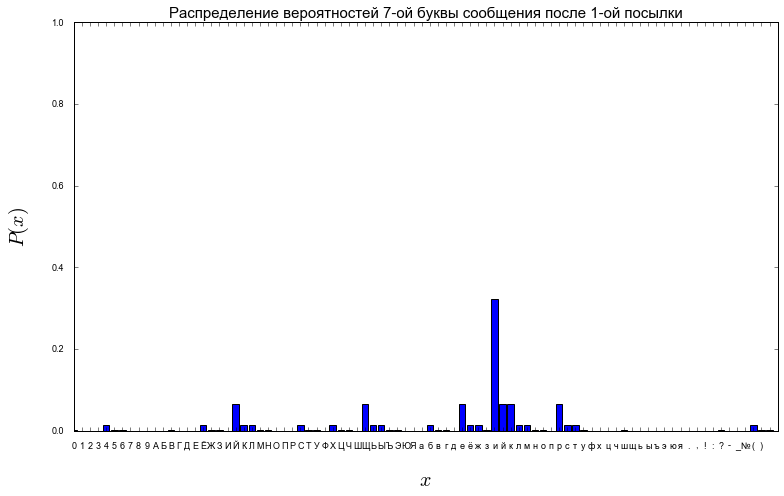

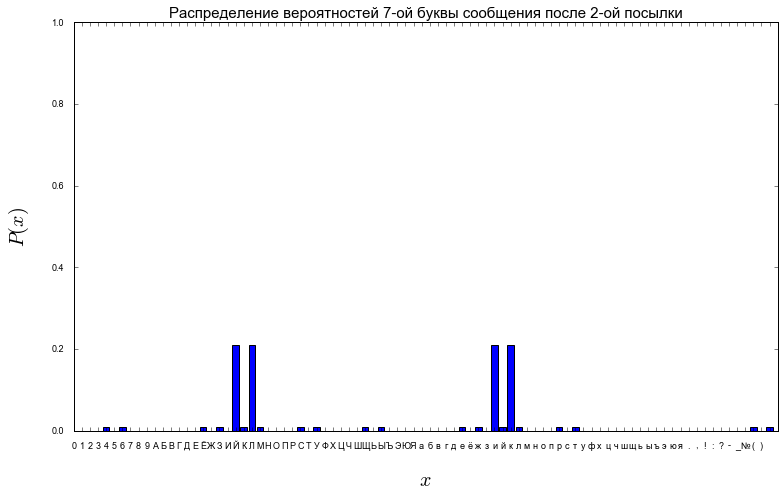

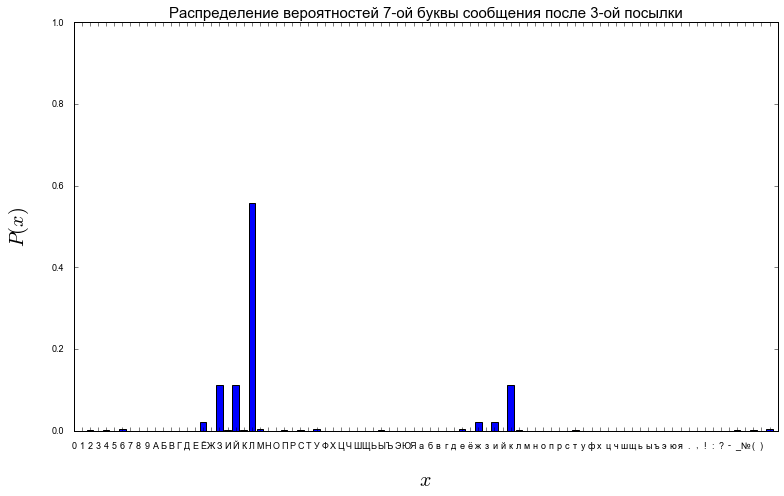

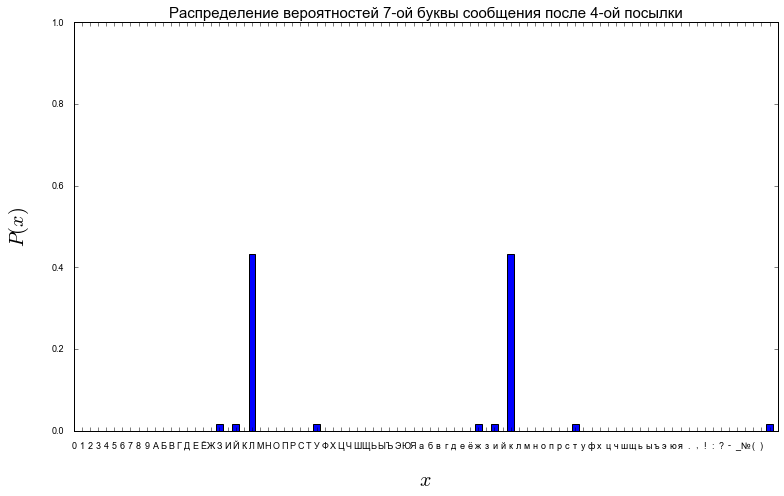

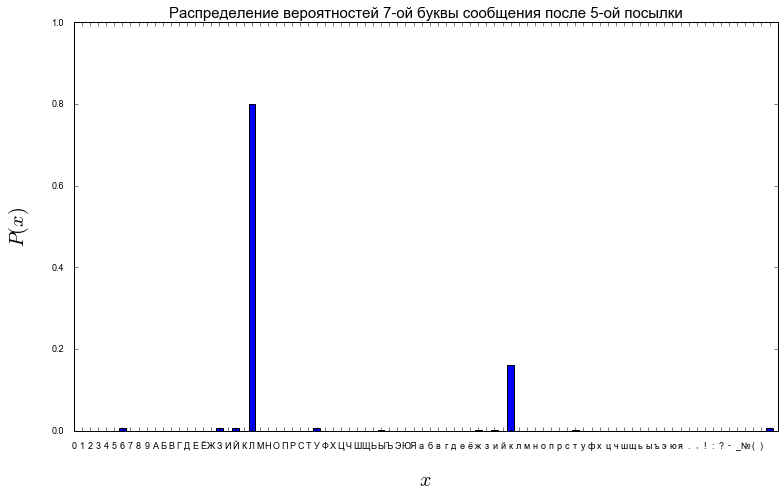

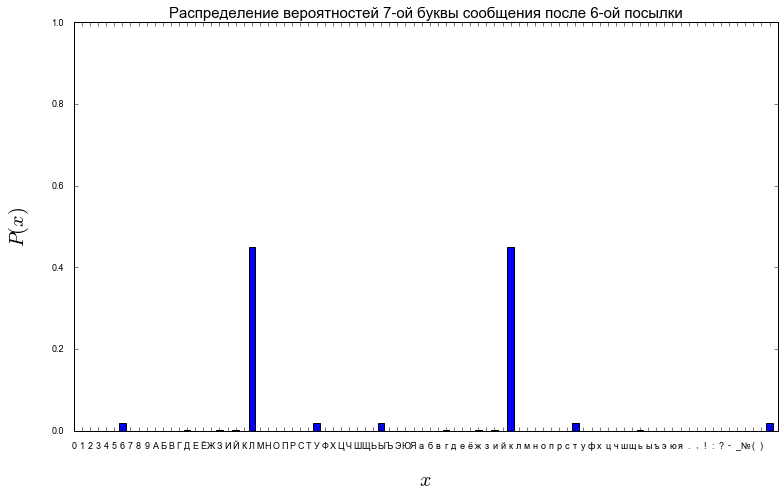

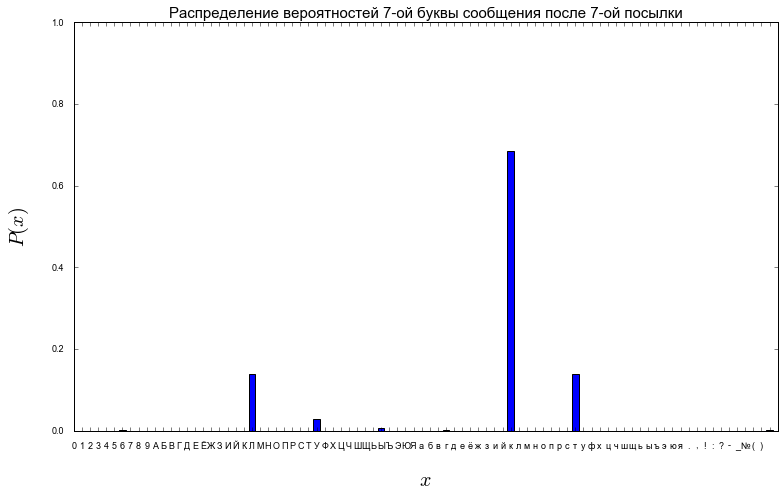

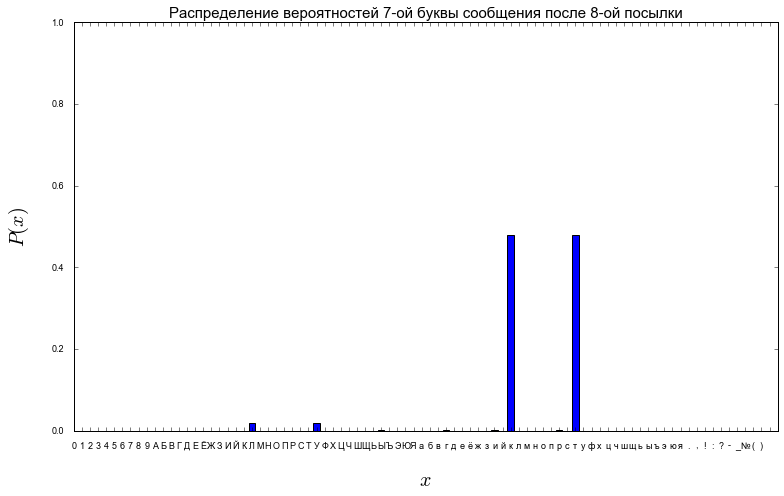

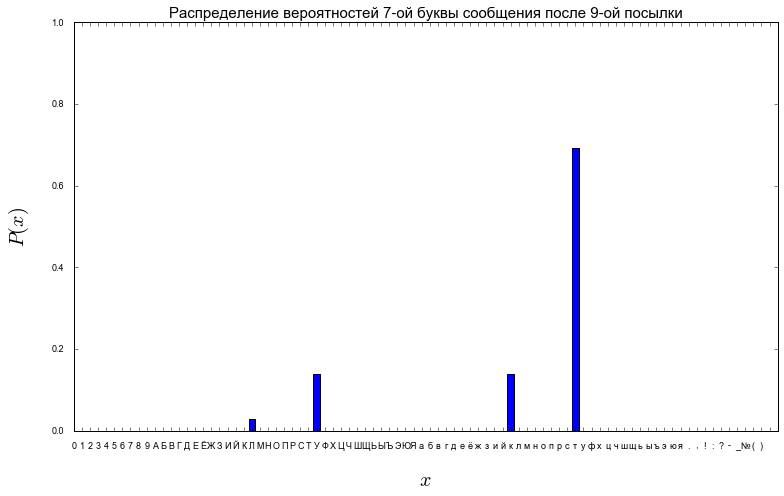

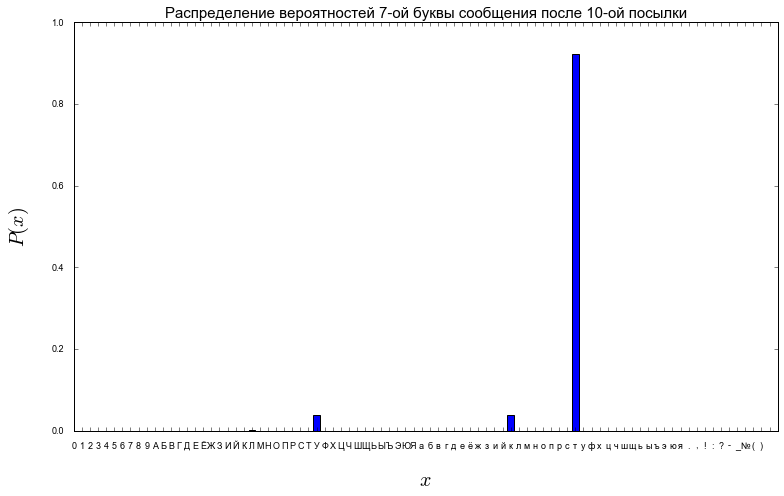

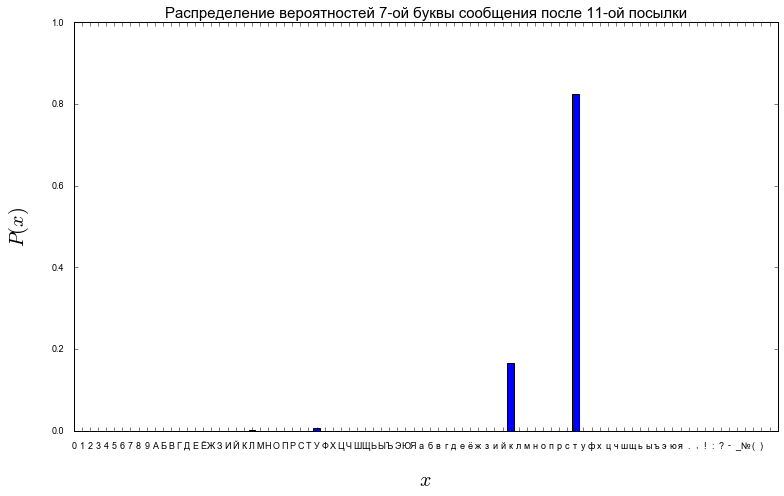

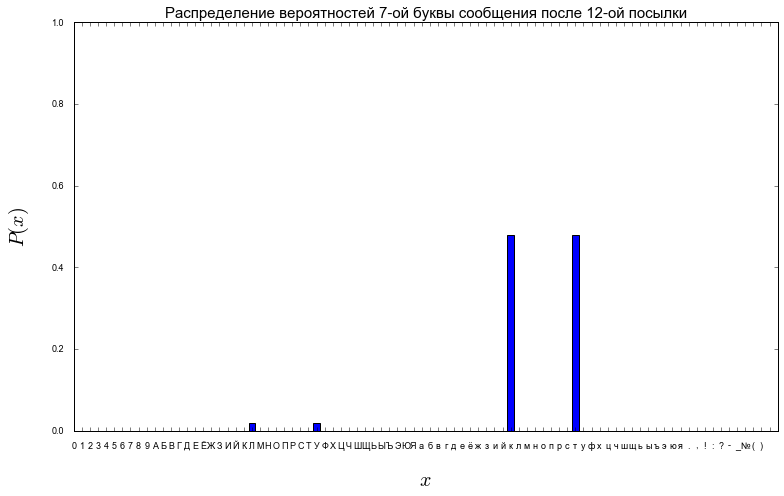

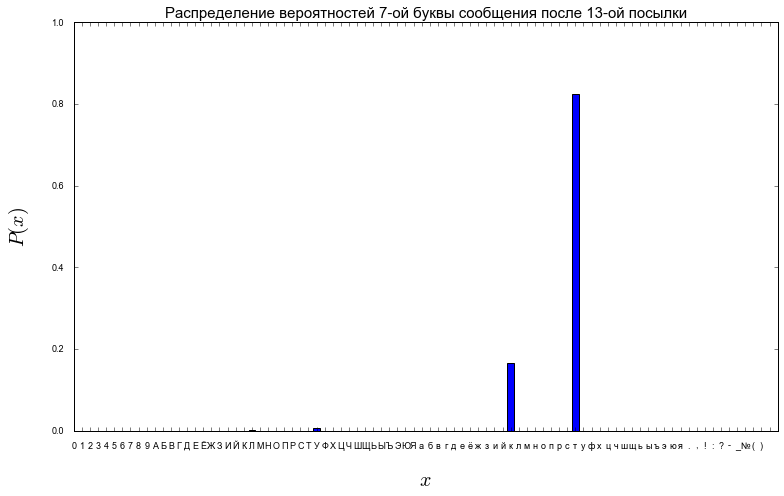

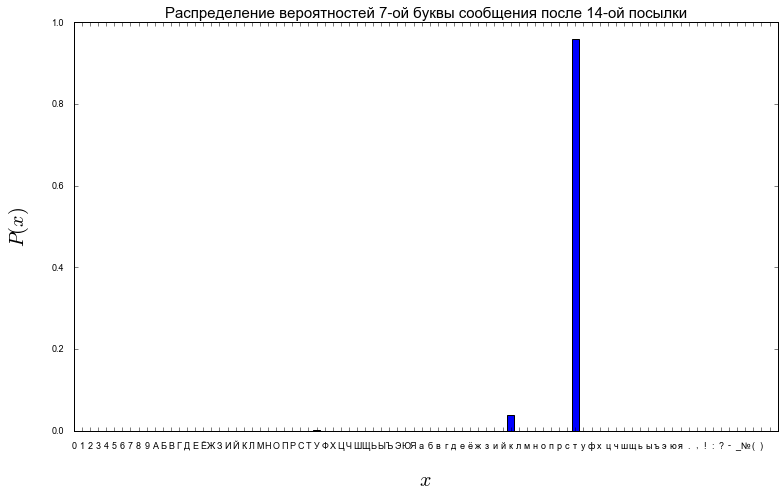

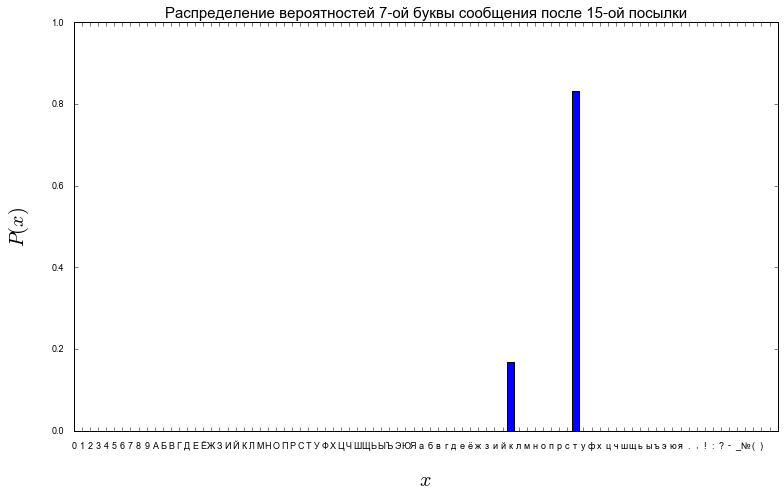

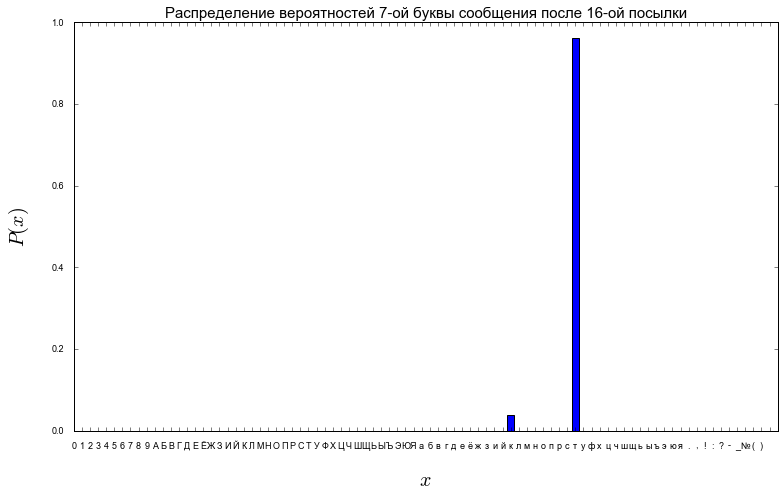

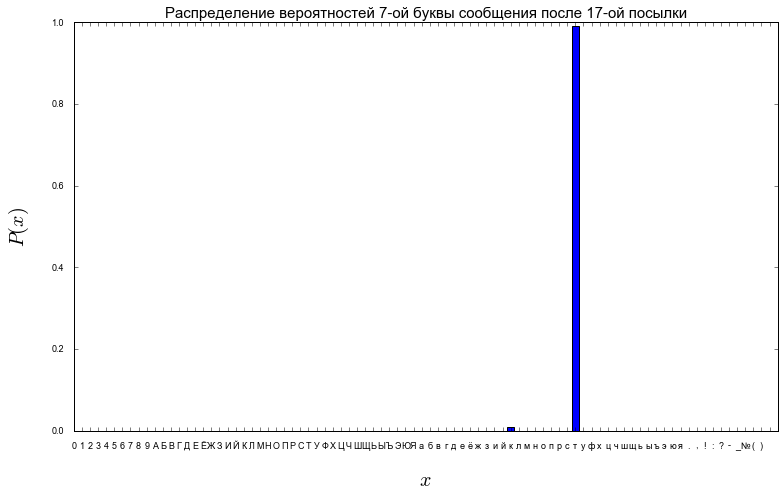

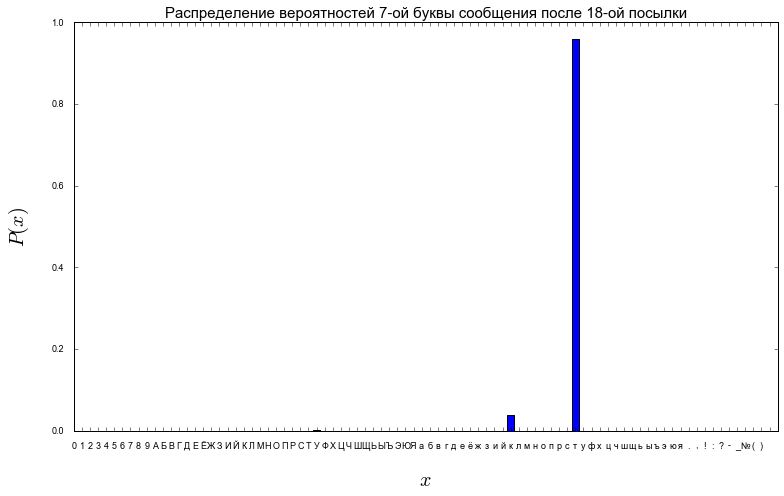

In [27]:
import matplotlib.pyplot as plt
from matplotlib import rc
font = {'family': 'Arial', 'weight': 'normal'}
rc('font', **font)

for i in range(m):  # для каждого сообщения
    char_num = 7
    curr = chars[i][char_num]
    
    sorted_keys = get_sorted_keys()
    sorted_values = []
    for key in sorted_keys:
        sorted_values.append(curr[key])
    
    fig = plt.figure(figsize=(11,7))
    plt.bar(range(len(alphabet)), sorted_values, align='center')
    plt.xticks(range(len(curr)), sorted_keys)
    plt.xlabel('$x$', fontsize=20, labelpad=20)
    plt.ylabel('$P(x)$', fontsize=20, labelpad=20)
    plt.tick_params(labelsize=9, pad=10)
    plt.title('Распределение вероятностей {0}-ой буквы сообщения после {1}-ой посылки'.format(char_num,i+1), fontsize=15)
    plt.tight_layout()
    plt.xlim([0, len(curr)])
    plt.ylim([0, 1])
    plt.tight_layout()
    #plt.savefig('./pics/uniform{i}.png'.format(i=i+1))
    plt.show()
    plt.close(fig)

In [ ]:
xes = range(1, m+1)

fig = plt.figure(figsize=(11,7))
plt.plot(xes, entropies)
#plt.plot(xes, cond_entropies)
plt.xlabel('message', fontsize=20, labelpad=20)
plt.ylabel('$H(x)$', fontsize=20, labelpad=20)
plt.tick_params(labelsize=15, pad=10)
plt.title('Энтропия {0}-ой буквы сообщения'.format(check,i+1), fontsize=15)
plt.tight_layout()
plt.tight_layout()
#plt.savefig('./pics/weight{i}.png'.format(i=i+1))
plt.show()

#### Вероятности задаются исходя из частоты встречания букв в русском языке

In [ ]:
with open('frequencies.txt', encoding='utf8') as f:
    content = f.readlines()
    frequncies = {}
    content = [x.rstrip().split('\t') for x in content] 
    for pair in content:
        frequncies[pair[0]] = float(pair[1])
    print(frequncies)

In [ ]:
def get_frequency(char: str):
    assert len(char) == 1
    char = char.lower()
    if char in frequncies.keys():
        return 33 * apriori[char] * frequncies[char] / sum(frequncies.values())
    else:
        return apriori[char]

In [ ]:
apriori_weight = apriori.copy()
for key in apriori_weight.keys():
    apriori_weight[key] = get_frequency(key)
    
print(apriori_weight)

In [ ]:
chars = []

for i in range(s):
    char = apriori_weight.copy()
    chars.append(char)
    
entropies_weight = []

for i in range(m):
    for j in range(s):
        posterior_probabilities(chars[j], messages[i][j])
          
    check = 7
    curr = chars[check]
    sorted_keys = get_sorted_keys()
    sorted_values = []
    for key in sorted_keys:
        sorted_values.append(curr[key])
        
    entropies_weight.append(entropy(curr))
        
    fig = plt.figure(figsize=(11,7))
    plt.bar(range(len(curr)), sorted_values, align='center')
    plt.xticks(range(len(curr)), sorted_keys)
    plt.xlabel('$x$', fontsize=20, labelpad=20)
    plt.ylabel('$P(x)$', fontsize=20, labelpad=20)
    plt.tick_params(labelsize=9, pad=10)
    plt.title('Распределение вероятностей {0}-ой буквы сообщения после {1}-ой посылки'.format(check,i+1), fontsize=15)
    plt.tight_layout()
    plt.xlim([0, len(curr)])
    plt.ylim([0, 1])
    plt.tight_layout()
    #plt.savefig('./pics/weight{i}.png'.format(i=i+1))
    plt.close(fig)
    
    print(i+1, end=': ')
    for char in chars:
        max_char = find_max(char)
        print(max_char, end='')
    print()

Из результатов видно, что в ситуации, когда вероятности задаются ихсодя из частоты встречания букв в русском языке, зашумленное сообщение было распознано быстрее

#### 1.2. Расчет энтропии и количества информации

In [ ]:
xes = range(1, m+1)

fig = plt.figure(figsize=(11,7))
plt.plot(xes, entropies)
plt.plot(xes, entropies_weight)
plt.xlabel('message', fontsize=20, labelpad=20)
plt.ylabel('$H(x)$', fontsize=20, labelpad=20)
plt.tick_params(labelsize=15, pad=10)
plt.title('Энтропия {0}-ой буквы сообщения'.format(check,i+1), fontsize=15)
plt.tight_layout()
plt.tight_layout()
#plt.savefig('./pics/weight{i}.png'.format(i=i+1))
plt.show()

In [ ]:
fig = plt.figure(figsize=(11,7))
plt.plot(infos)
plt.xlabel('message', fontsize=20, labelpad=20)
plt.ylabel('$I(x)$', fontsize=20, labelpad=20)
plt.tick_params(labelsize=15, pad=10)
plt.title('Информация о {0}-ой букве'.format(check,i+1), fontsize=15)
plt.tight_layout()
plt.tight_layout()
#plt.savefig('./pics/weight{i}.png'.format(i=i+1))
plt.show()